In [4]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
import os
import random
import shutil

# Define the paths
source_folder = "/content/drive/MyDrive/Marine_Debris/without debris"
train_folder = "/content/drive/MyDrive/Marine_Debris/without debris/train"
test_folder = "/content/drive/MyDrive/Marine_Debris/without debris/test"
validate_folder = "/content/drive/MyDrive/Marine_Debris/without debris/validate"

# Create destination folders if they don't exist
for folder in [train_folder, test_folder, validate_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# List all the images in the source folder
images = os.listdir(source_folder)
# Shuffle the list of images
random.shuffle(images)

# Calculate the number of images for each split
total_images = len(images)
train_count = int(0.7 * total_images)
test_count = int(0.15 * total_images)

# Assign images to train, test, and validate folders
train_images = images[:train_count]
test_images = images[train_count:train_count + test_count]
validate_images = images[train_count + test_count:]

# Move images to respective folders
for image in train_images:
    shutil.move(os.path.join(source_folder, image), os.path.join(train_folder, image))
for image in test_images:
    shutil.move(os.path.join(source_folder, image), os.path.join(test_folder, image))
for image in validate_images:
    shutil.move(os.path.join(source_folder, image), os.path.join(validate_folder, image))

print("Splitting completed successfully.")

Splitting completed successfully.


In [6]:
                          pip install imgaug

In [7]:
import os
import imgaug.augmenters as iaa
import cv2
from tqdm import tqdm

# Define the folder containing your images and the output folder for augmented images
input_folder = '/content/drive/MyDrive/Marine_Debris/without debris/validate1'
output_folder = '/content/drive/MyDrive/Marine_Debris/without debris/validate'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

if not os.path.exists(input_folder):
    os.makedirs(input_folder)

# Define the augmentation pipeline using imgaug
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # 50% horizontal flips
    iaa.Flipud(0.5),  # 50% vertical flips
    iaa.Affine(rotate=(-10, 10)),  # Rotate images by -10 to 10 degrees
])

# List all the image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Augment each image and save it to the output folder
for image_file in tqdm(image_files, desc="Augmenting Images"):
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    augmented_images = [seq(image=image) for _ in range(3)]  # Augment each image 3 times

    # Save augmented images to the output folder with a suffix
    for idx, augmented_image in enumerate(augmented_images):
        output_file = os.path.splitext(image_file)[0] + f"_aug_{idx}.jpg"
        output_path = os.path.join(output_folder, output_file)
        cv2.imwrite(output_path, augmented_image)

print("Augmentation complete.")

Augmenting Images: 0it [00:00, ?it/s]

Augmentation complete.


Found 469 images belonging to 2 classes.
Found 105 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/5
15/15 [==============================] - 72s 4s/step - loss: 0.7912 - accuracy: 0.5224 - val_loss: 0.6518 - val_accuracy: 0.5429
Epoch 2/5
15/15 [==============================] - 31s 2s/step - loss: 0.5530 - accuracy: 0.7612 - val_loss: 0.6634 - val_accuracy: 0.8000
Epoch 3/5
15/15 [==============================] - 34s 2s/step - loss: 0.4297 - accuracy: 0.8316 - val_loss: 0.9168 - val_accuracy: 0.7905
Epoch 4/5
15/15 [==============================] - 28s 2s/step - loss: 0.3591 - accuracy: 0.8614 - val_loss: 0.9532 - val_accuracy: 0.7333
Epoch 5/5
15/15 [==============================] - 26s 2s/step - loss: 0.3436 - accuracy: 0.8593 - val_loss: 0.5261 - val_accuracy: 0.8095


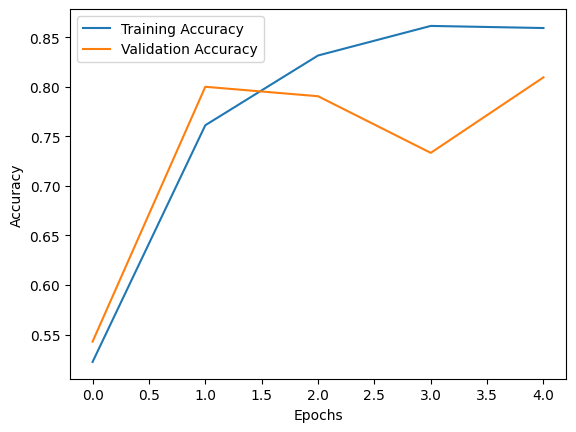

3/3 [==============================] - 3s 861ms/step - loss: 0.3375 - accuracy: 0.9062
Test Loss: 0.3375036418437958
Test Accuracy: 0.90625
3/3 [==============================] - 2s 434ms/step


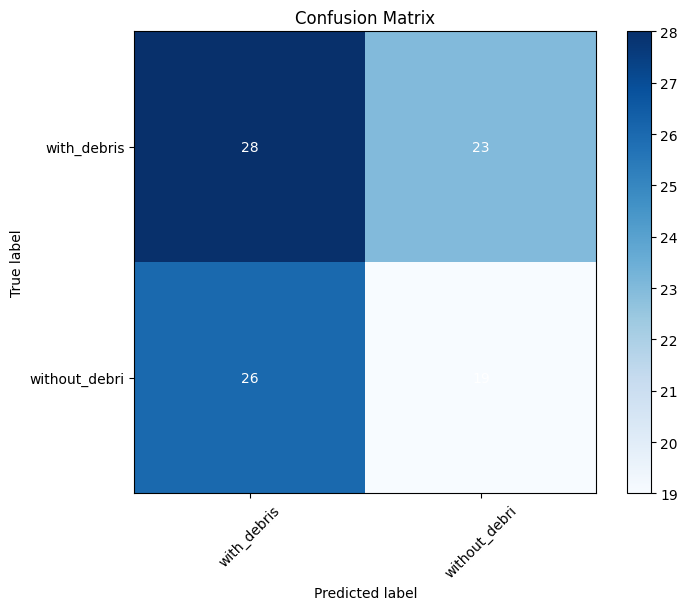

F1 Score: 0.4367816091954023


In [8]:
# SIMPLE CNN - Augmented

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Marine_Debris/train'
validation_data_dir = '/content/drive/MyDrive/Marine_Debris/validate'
test_data_dir = '/content/drive/MyDrive/Marine_Debris/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['with_debris', 'without_debri']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

Test Accuracy: 0.8333333333333334


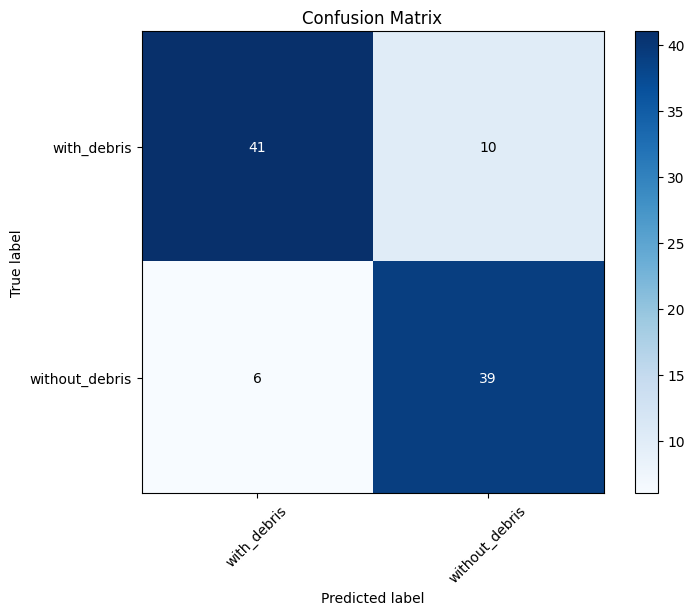

F1 Score: 0.8334780720798959


In [9]:
# Random Forest

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Marine_Debris/train'
validation_data_dir = '/content/drive/MyDrive/Marine_Debris/validate'
test_data_dir = '/content/drive/MyDrive/Marine_Debris/test'

# Function to load images and labels
def load_data(data_dir):
    X = []
    y = []
    labels = os.listdir(data_dir)
    for label in labels:
        label_dir = os.path.join(data_dir, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = Image.open(img_path)
            img = img.resize((150, 150))  # Resize images if needed
            img_array = np.array(img)
            X.append(img_array)
            y.append(label)
    return np.array(X), np.array(y)

# Load training, validation, and test data
X_train, y_train = load_data(train_data_dir)
X_test, y_test = load_data(test_data_dir)

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Evaluate the classifier
test_accuracy = rf_classifier.score(X_test_flat, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = rf_classifier.predict(X_test_flat)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = np.unique(y_test)
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')


Found 469 images belonging to 2 classes.
Found 105 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/5
15/15 [==============================] - 29s 2s/step - loss: 1.0229 - accuracy: 0.5032 - val_loss: 0.6711 - val_accuracy: 0.5429
Epoch 2/5
15/15 [==============================] - 30s 2s/step - loss: 0.5795 - accuracy: 0.6525 - val_loss: 0.7370 - val_accuracy: 0.6857
Epoch 3/5
15/15 [==============================] - 26s 2s/step - loss: 0.4559 - accuracy: 0.7996 - val_loss: 0.5531 - val_accuracy: 0.7714
Epoch 4/5
15/15 [==============================] - 26s 2s/step - loss: 0.3695 - accuracy: 0.8571 - val_loss: 0.6561 - val_accuracy: 0.7714
Epoch 5/5
15/15 [==============================] - 27s 2s/step - loss: 0.3191 - accuracy: 0.8699 - val_loss: 0.5698 - val_accuracy: 0.8095


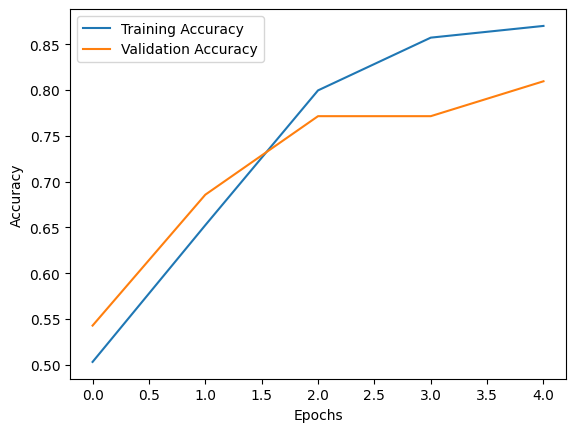

3/3 [==============================] - 2s 424ms/step - loss: 0.3907 - accuracy: 0.8750
Test Loss: 0.3907153606414795
Test Accuracy: 0.875
3/3 [==============================] - 3s 721ms/step


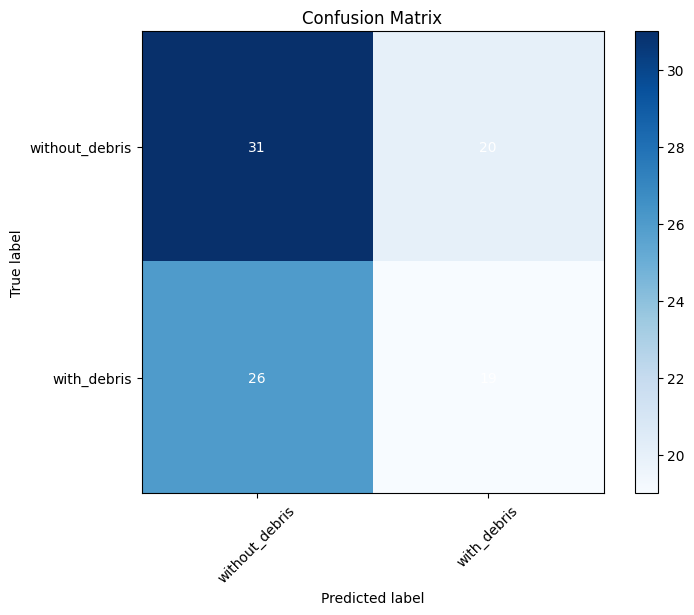

F1 Score: 0.4523809523809524
3/3 [==============================] - 2s 367ms/step


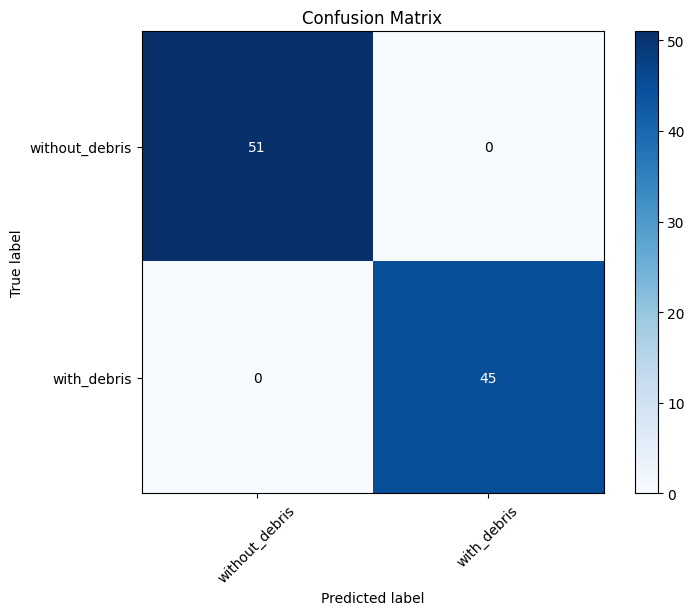

Random Forest F1 Score: 1.0
Random Forest Accuracy: 100.00%


In [10]:
# CNN + Random Forest Classifier

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Marine_Debris/train'
validation_data_dir = '/content/drive/MyDrive/Marine_Debris/validate'
test_data_dir = '/content/drive/MyDrive/Marine_Debris/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['without_debris', 'with_debris']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to Random Forest
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(cnn_features, y_true)

# Make predictions with the Random Forest classifier
rf_predictions = random_forest_classifier.predict(cnn_features)

# Calculate the confusion matrix for Random Forest predictions
rf_confusion = confusion_matrix(y_true, rf_predictions)

# Plot the Random Forest confusion matrix
plot_confusion_matrix(rf_confusion, classes=class_names)

# Calculate and print F1 score for Random Forest
rf_f1 = f1_score(y_true, rf_predictions)
print(f'Random Forest F1 Score: {rf_f1}')

# Calculate the accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_true, rf_predictions)
rf_accuracy_percentage = rf_accuracy * 100.0

print(f'Random Forest Accuracy: {rf_accuracy_percentage:.2f}%')


# Code Explanation -
# Feature Extraction with CNN: Features are extracted from the test data using the trained CNN model. These features are representations of the test images in a high-dimensional space.

# Random Forest Classifier: A Random Forest classifier from sklearn.ensemble is created with 100 trees.
# The extracted CNN features are used as input for the Random Forest classifier.
# The Random Forest model is trained on these features.

# Predictions with Random Forest: The trained Random Forest classifier is used to make predictions on the test data using the extracted features.

Found 469 images belonging to 2 classes.
Found 105 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/5
15/15 [==============================] - 29s 2s/step - loss: 0.6671 - accuracy: 0.6333 - val_loss: 0.6686 - val_accuracy: 0.7048
Epoch 2/5
15/15 [==============================] - 28s 2s/step - loss: 0.4937 - accuracy: 0.7783 - val_loss: 0.7131 - val_accuracy: 0.7429
Epoch 3/5
15/15 [==============================] - 28s 2s/step - loss: 0.3806 - accuracy: 0.8380 - val_loss: 0.5633 - val_accuracy: 0.8190
Epoch 4/5
15/15 [==============================] - 28s 2s/step - loss: 0.3202 - accuracy: 0.8699 - val_loss: 0.6550 - val_accuracy: 0.7810
Epoch 5/5
15/15 [==============================] - 26s 2s/step - loss: 0.2868 - accuracy: 0.8806 - val_loss: 0.5353 - val_accuracy: 0.7714


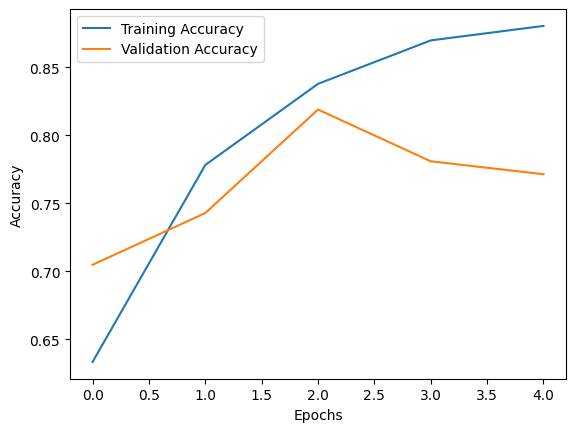

3/3 [==============================] - 3s 741ms/step - loss: 0.2983 - accuracy: 0.8750
Test Loss: 0.29832881689071655
Test Accuracy: 0.875
3/3 [==============================] - 3s 649ms/step


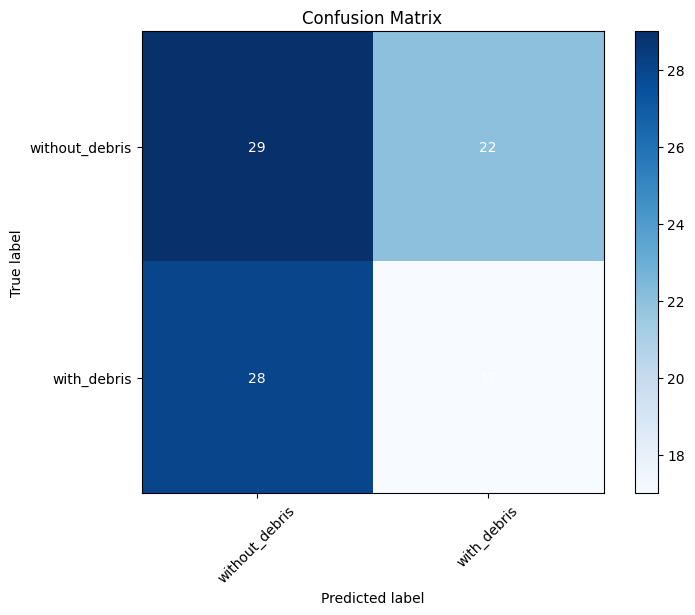

F1 Score: 0.40476190476190477
3/3 [==============================] - 2s 394ms/step


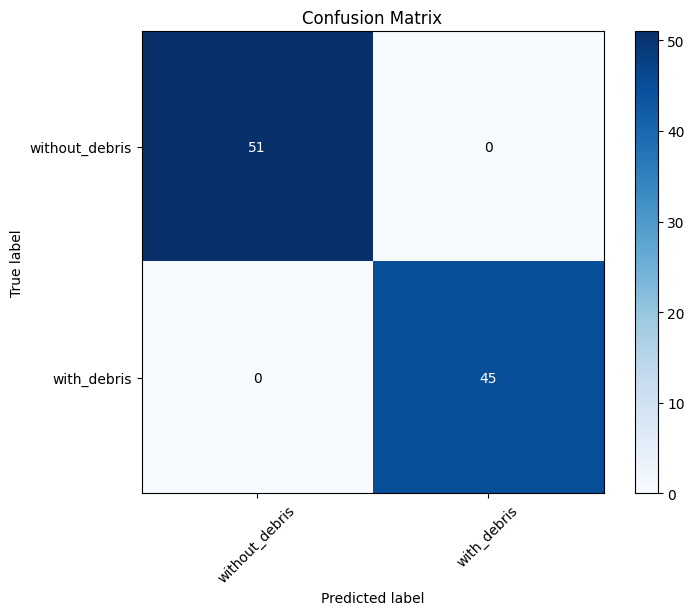

Random Forest F1 Score: 1.0
Random Forest Accuracy: 100.00%
1/1 [==============================] - 0s 85ms/step
Debris Percentage: 41.90%


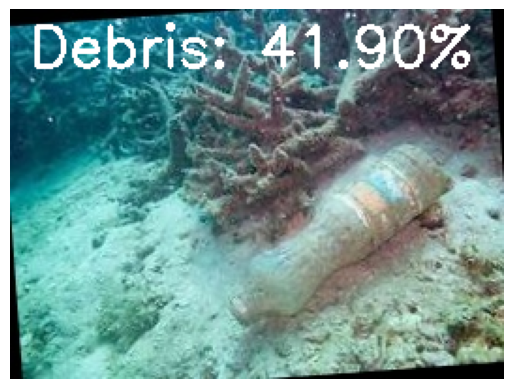

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier
import cv2

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Marine_Debris/train'
validation_data_dir = '/content/drive/MyDrive/Marine_Debris/validate'
test_data_dir = '/content/drive/MyDrive/Marine_Debris/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['without_debris', 'with_debris']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to Random Forest
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(cnn_features, y_true)

# Make predictions with the Random Forest classifier
rf_predictions = random_forest_classifier.predict(cnn_features)

# Calculate the confusion matrix for Random Forest predictions
rf_confusion = confusion_matrix(y_true, rf_predictions)

# Plot the Random Forest confusion matrix
plot_confusion_matrix(rf_confusion, classes=class_names)

# Calculate and print F1 score for Random Forest
rf_f1 = f1_score(y_true, rf_predictions)
print(f'Random Forest F1 Score: {rf_f1}')

# Calculate the accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_true, rf_predictions)
rf_accuracy_percentage = rf_accuracy * 100.0

print(f'Random Forest Accuracy: {rf_accuracy_percentage:.2f}%')

# Load an example image for demonstration
example_image_path = '/content/drive/MyDrive/Marine_Debris/test/with_debris/109_aug_0.jpg'
example_image = cv2.imread(example_image_path)
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Preprocess the image to match the input shape of the CNN model
resized_image = cv2.resize(example_image, (img_width, img_height))
normalized_image = resized_image / 255.0  # Normalize the pixel values

# Reshape the image to match the input shape of the CNN model
input_image = normalized_image.reshape(1, img_width, img_height, 3)

# Predict using the CNN model
cnn_prediction = model.predict(input_image)

# Predict using the Random Forest classifier
rf_prediction = random_forest_classifier.predict_proba(cnn_features)[0][1]

# Convert the prediction to percentage
cnn_debris_percentage = cnn_prediction[0][0] * 100
rf_debris_percentage = rf_prediction * 100

# Highlight the percentage of debris on the image
highlighted_image = example_image.copy()
cv2.putText(highlighted_image, f"Debris: {cnn_debris_percentage:.2f}%", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

print(f'Debris Percentage: {cnn_debris_percentage:.2f}%')



# Display the image with highlighted percentages
plt.imshow(highlighted_image)
plt.axis('off')
plt.show()


Found 469 images belonging to 2 classes.
Found 105 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/5
15/15 [==============================] - 29s 2s/step - loss: 0.6243 - accuracy: 0.6439 - val_loss: 0.7222 - val_accuracy: 0.7524
Epoch 2/5
15/15 [==============================] - 28s 2s/step - loss: 0.5097 - accuracy: 0.7591 - val_loss: 0.7864 - val_accuracy: 0.7048
Epoch 3/5
15/15 [==============================] - 26s 2s/step - loss: 0.4474 - accuracy: 0.8145 - val_loss: 0.7738 - val_accuracy: 0.6571
Epoch 4/5
15/15 [==============================] - 25s 2s/step - loss: 0.3740 - accuracy: 0.8443 - val_loss: 0.9674 - val_accuracy: 0.7048
Epoch 5/5
15/15 [==============================] - 26s 2s/step - loss: 0.3346 - accuracy: 0.8721 - val_loss: 0.5560 - val_accuracy: 0.8571


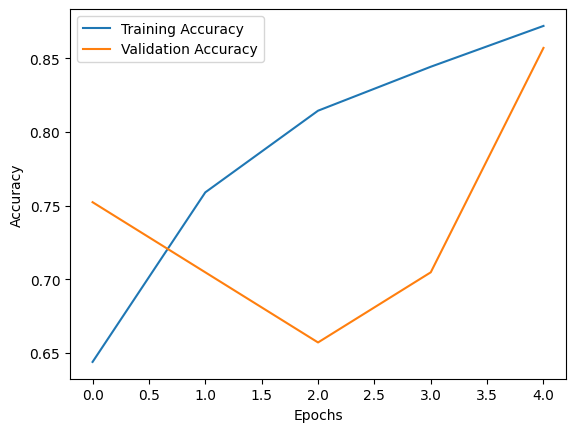

3/3 [==============================] - 2s 426ms/step - loss: 0.3223 - accuracy: 0.9062
Test Loss: 0.322292685508728
Test Accuracy: 0.90625
3/3 [==============================] - 2s 481ms/step


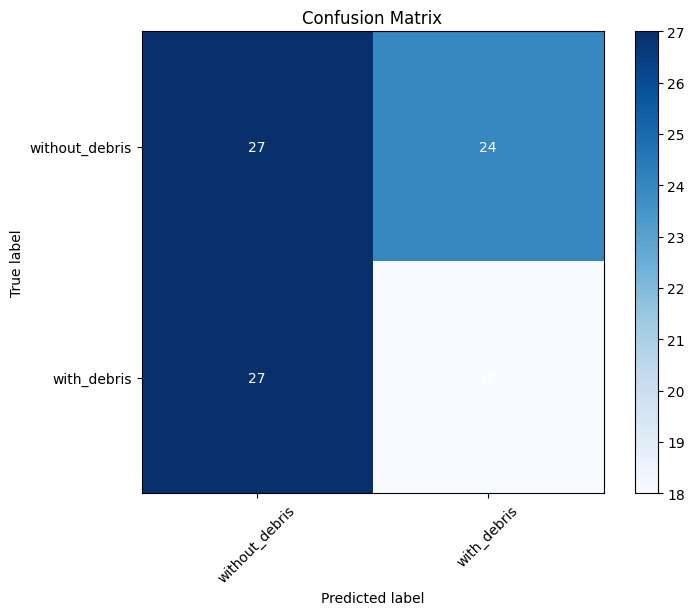

F1 Score: 0.4137931034482759
3/3 [==============================] - 2s 335ms/step


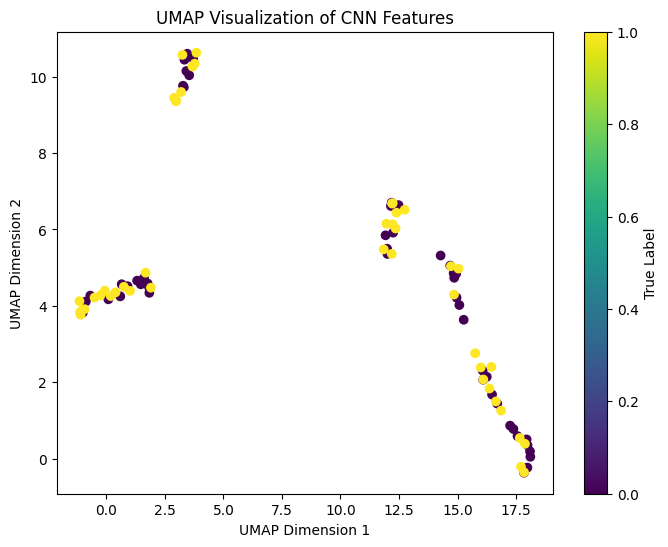

In [12]:
!pip install umap-learn

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier
import umap

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Marine_Debris/train'
validation_data_dir = '/content/drive/MyDrive/Marine_Debris/validate'
test_data_dir = '/content/drive/MyDrive/Marine_Debris/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['without_debris', 'with_debris']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to UMAP
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Visualize CNN features using UMAP
umap_emb = umap.UMAP(n_neighbors=15, min_dist=0.1)
cnn_features_umap = umap_emb.fit_transform(cnn_features)

# Plot UMAP visualization
plt.figure(figsize=(8, 6))
plt.scatter(cnn_features_umap[:, 0], cnn_features_umap[:, 1], c=y_true, cmap='viridis')
plt.title('UMAP Visualization of CNN Features')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='True Label')
plt.show()


In [13]:
pip install streamlit

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 469 images belonging to 2 classes.
Found 105 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/5
15/15 [==============================] - 62s 4s/step - loss: 0.8079 - accuracy: 0.5778 - val_loss: 0.6688 - val_accuracy: 0.6190
Epoch 2/5
15/15 [==============================] - 27s 2s/step - loss: 0.4951 - accuracy: 0.7633 - val_loss: 0.5622 - val_accuracy: 0.8000
Epoch 3/5
15/15 [==============================] - 32s 2s/step - loss: 0.4051 - accuracy: 0.8294 - val_loss: 0.5829 - val_accuracy: 0.8000
Epoch 4/5
15/15 [==============================] - 33s 2s/step - loss: 0.4003 - accuracy: 0.8337 - val_loss: 0.6573 - val_accuracy: 0.8000
Epoch 5/5
15/15 [==============================] - 27s 2s/step - loss: 0.4187 - accuracy: 0.8188 - val_loss: 0.5142 - val_accuracy: 0.8381


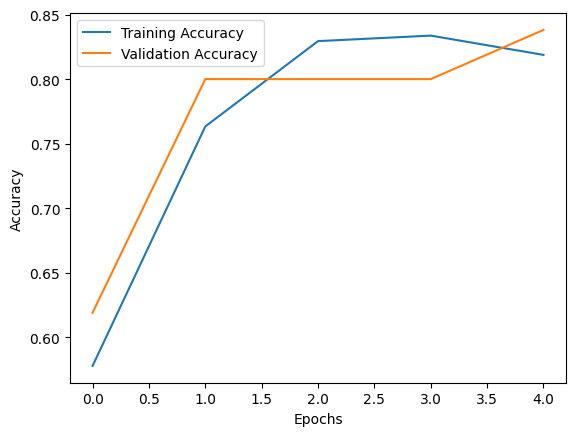

3/3 [==============================] - 2s 413ms/step - loss: 0.3929 - accuracy: 0.9062
Test Loss: 0.3928884267807007
Test Accuracy: 0.90625
3/3 [==============================] - 2s 466ms/step


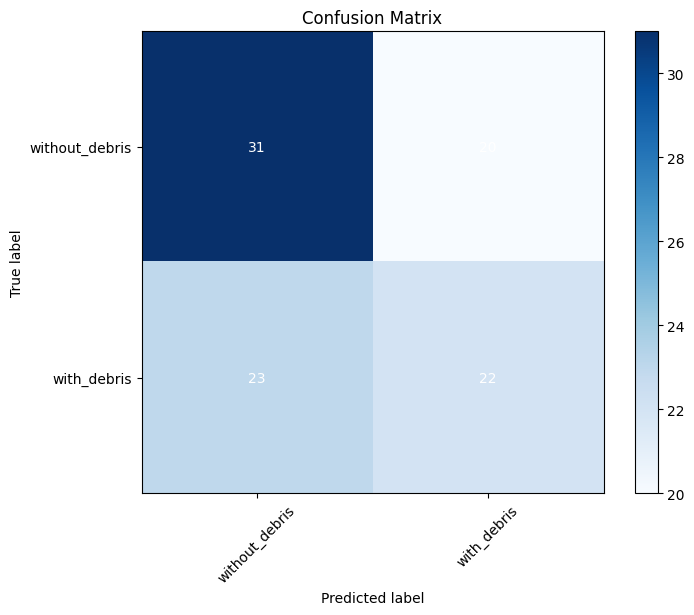

F1 Score: 0.5057471264367817
3/3 [==============================] - 2s 427ms/step


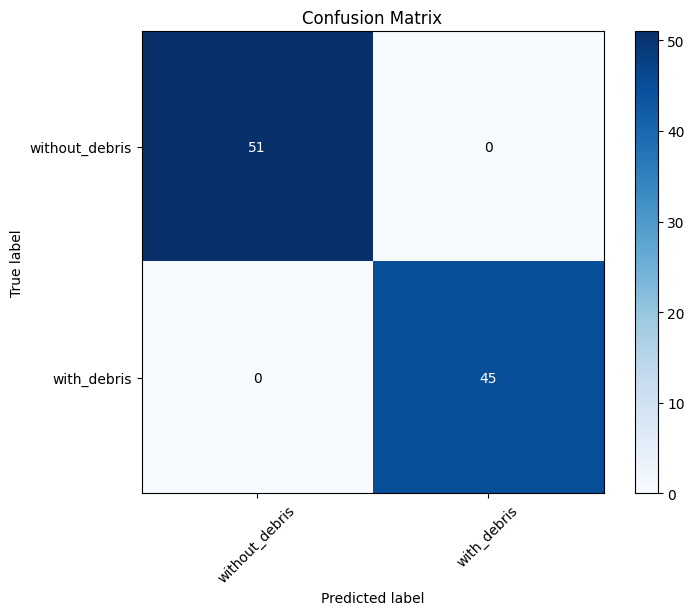

Random Forest F1 Score: 1.0
Random Forest Accuracy: 100.00%


2024-05-10 05:49:14.786 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [14]:
!pip install streamlit
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier
import streamlit as st
from PIL import Image

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Marine_Debris/train'
validation_data_dir = '/content/drive/MyDrive/Marine_Debris/validate'
test_data_dir = '/content/drive/MyDrive/Marine_Debris/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['without_debris', 'with_debris']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to Random Forest
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(cnn_features, y_true)

# Make predictions with the Random Forest classifier
rf_predictions = random_forest_classifier.predict(cnn_features)

# Calculate the confusion matrix for Random Forest predictions
rf_confusion = confusion_matrix(y_true, rf_predictions)

# Plot the Random Forest confusion matrix
plot_confusion_matrix(rf_confusion, classes=class_names)

# Calculate and print F1 score for Random Forest
rf_f1 = f1_score(y_true, rf_predictions)
print(f'Random Forest F1 Score: {rf_f1}')

# Calculate the accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_true, rf_predictions)
rf_accuracy_percentage = rf_accuracy * 100.0

print(f'Random Forest Accuracy: {rf_accuracy_percentage:.2f}%')

# Streamlit app
st.title("Marine Debris Detection")
st.write("Upload an image to detect marine debris.")

# Function to preprocess the uploaded image
def preprocess_image(image_data):
    img = Image.open(image_data)
    img = img.resize((img_width, img_height))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make predictions
def predict(image):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    return prediction

uploaded_image = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    st.image(uploaded_image, caption='Uploaded Image', use_column_width=True)
    st.write("")
    st.write("Classifying...")
    prediction = predict(uploaded_image)
    percentage_debris = prediction[0][0] * 100
    st.write(f"Prediction: {class_names[int(round(prediction[0][0]))]}")
    st.write(f"Percentage of debris: {percentage_debris:.2f}%")


Found 469 images belonging to 2 classes.
Found 105 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/5
15/15 [==============================] - 34s 2s/step - loss: 0.7989 - accuracy: 0.6098 - val_loss: 0.6973 - val_accuracy: 0.6095
Epoch 2/5
15/15 [==============================] - 30s 2s/step - loss: 0.5104 - accuracy: 0.7548 - val_loss: 0.5634 - val_accuracy: 0.7524
Epoch 3/5
15/15 [==============================] - 26s 2s/step - loss: 0.3929 - accuracy: 0.8443 - val_loss: 0.5421 - val_accuracy: 0.8000
Epoch 4/5
15/15 [==============================] - 27s 2s/step - loss: 0.3216 - accuracy: 0.8635 - val_loss: 0.8991 - val_accuracy: 0.7143
Epoch 5/5
15/15 [==============================] - 28s 2s/step - loss: 0.4113 - accuracy: 0.8337 - val_loss: 0.5617 - val_accuracy: 0.8190


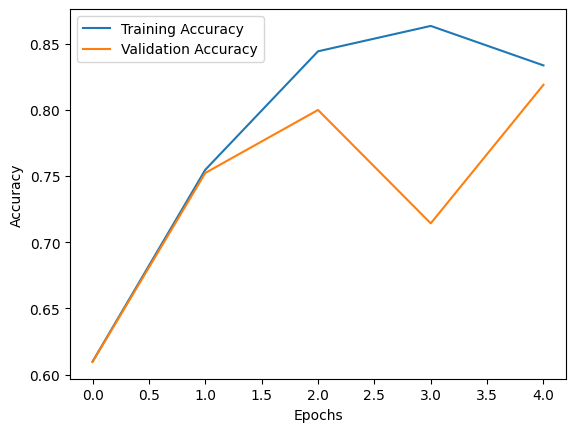

3/3 [==============================] - 2s 369ms/step - loss: 0.2985 - accuracy: 0.9062
Test Loss: 0.29850494861602783
Test Accuracy: 0.90625
3/3 [==============================] - 2s 401ms/step


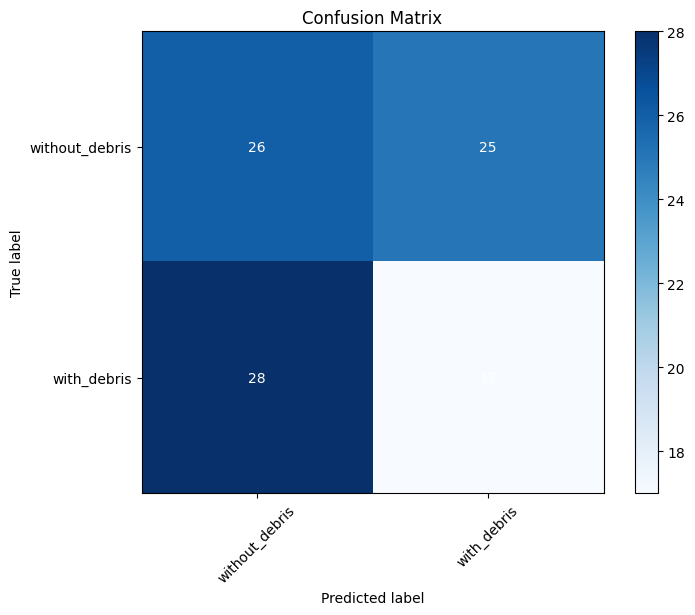

F1 Score: 0.39080459770114945
3/3 [==============================] - 3s 698ms/step


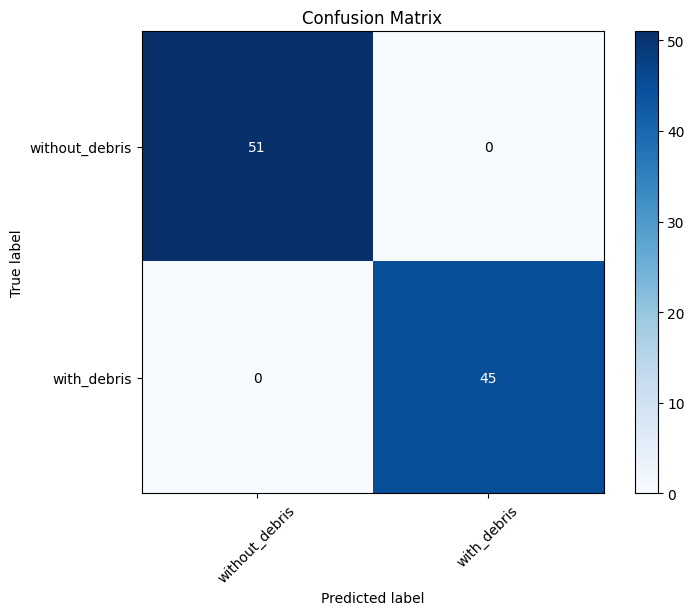

Random Forest F1 Score: 1.0
Random Forest Accuracy: 100.00%
1/1 [==============================] - 0s 59ms/step


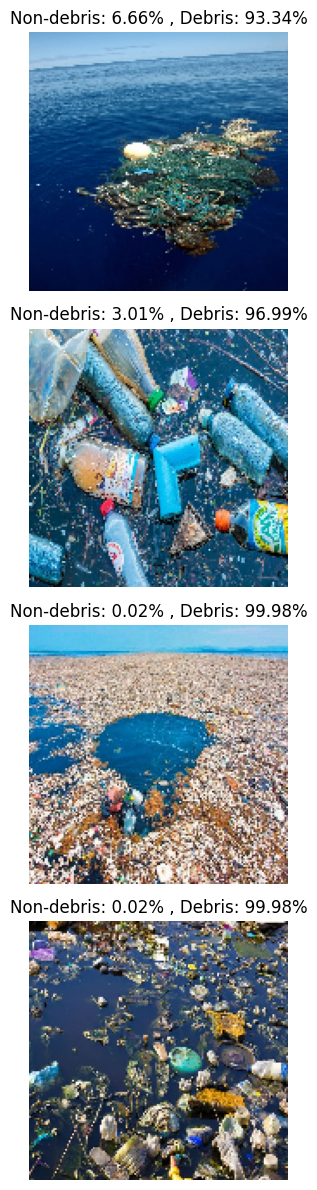

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing import image

# Define the paths to your data folders
train_data_dir = '/content/drive/MyDrive/Marine_Debris/train'
validation_data_dir = '/content/drive/MyDrive/Marine_Debris/validate'
test_data_dir = '/content/drive/MyDrive/Marine_Debris/test'

# Set parameters for image loading and preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training, validation, and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
y_true = test_generator.classes
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['without_debris', 'with_debris']
plot_confusion_matrix(confusion, classes=class_names)

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1}')

# Extract CNN features for test data
cnn_features = model.predict(test_generator)

# Reshape CNN features for input to Random Forest
cnn_features = cnn_features.reshape(cnn_features.shape[0], -1)

# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(cnn_features, y_true)

# Make predictions with the Random Forest classifier
rf_predictions = random_forest_classifier.predict(cnn_features)

# Calculate the confusion matrix for Random Forest predictions
rf_confusion = confusion_matrix(y_true, rf_predictions)

# Plot the Random Forest confusion matrix
plot_confusion_matrix(rf_confusion, classes=class_names)

# Calculate and print F1 score for Random Forest
rf_f1 = f1_score(y_true, rf_predictions)
print(f'Random Forest F1 Score: {rf_f1}')

# Calculate the accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_true, rf_predictions)
rf_accuracy_percentage = rf_accuracy * 100.0

print(f'Random Forest Accuracy: {rf_accuracy_percentage:.2f}%')

# Function to load and preprocess images
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = image.load_img(image_path, target_size=target_size)
    img = image.img_to_array(img) / 255.0  # Normalize the image
    return img


# List of paths to the 5 images
image_paths = [
    '/content/drive/MyDrive/project - images/image - 1.jpg',
    '/content/drive/MyDrive/project - images/image - 2.jpg',
    '/content/drive/MyDrive/project - images/image - 3.jpg',
    '/content/drive/MyDrive/project - images/image - 4.jpg'
]


# Load and preprocess images
loaded_images = [load_and_preprocess_image(img_path) for img_path in image_paths]

# Get titles (predicted percentage of debris) for each image
debris_percentages = []
non_debris_percentages = []
for img_path in image_paths:
    img = load_and_preprocess_image(img_path)
    prediction = model.predict(np.expand_dims(img, axis=0))
    debris_percentage = prediction[0][0] * 100
    debris_percentages.append(f"Non-debris: {debris_percentage:.2f}%");
    non_debris_percentages.append(f"Debris: {100 - debris_percentage:.2f}%")

# Function to display images in a grid format
def plot_images(images,titles_non , titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(f"{titles[i]} , {titles_non[i]}")

        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display images in a grid with titles
plot_images(loaded_images,non_debris_percentages ,debris_percentages , rows=len(image_paths), cols=1)


In [17]:
import cv2

# Load the image
image = cv2.imread('/content/drive/MyDrive/Marine_Debris/test/with_debris/109_aug_0.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment regions of interest
_, plastic_mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)  # Adjust threshold values accordingly
_, water_mask = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)  # Inverse threshold for water

# Calculate area of each region
plastic_area = cv2.countNonZero(plastic_mask)
water_area = cv2.countNonZero(water_mask)

# Calculate total area of the image
total_area = image.shape[0] * image.shape[1]

# Calculate percentage of plastic and water
plastic_percentage = (plastic_area / total_area) * 100
water_percentage = (water_area / total_area) * 100

print("Percentage of plastic:", plastic_percentage)
print("Percentage of water:", water_percentage)


Percentage of plastic: 61.92314373395611
Percentage of water: 63.85516589141302


Percentage of plastic: 17.407902271425847
Percentage of water: 96.06052893894085


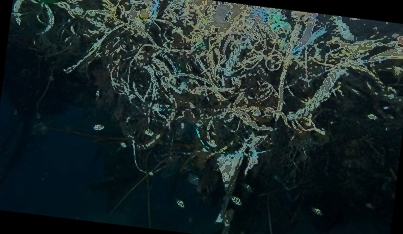

In [19]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/Marine_Debris/test/with_debris/8_aug_2.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment regions of interest
_, plastic_mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)  # Adjust threshold values accordingly
_, water_mask = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)  # Inverse threshold for water

# Highlight plastic and water regions on the original image
plastic_highlight = cv2.bitwise_and(image, image, mask=plastic_mask)
water_highlight = cv2.bitwise_and(image, image, mask=water_mask)

# Calculate area of each region
plastic_area = cv2.countNonZero(plastic_mask)
water_area = cv2.countNonZero(water_mask)

# Calculate total area of the image
total_area = image.shape[0] * image.shape[1]

# Calculate percentage of plastic and water
plastic_percentage = (plastic_area / total_area) * 100
water_percentage = (water_area / total_area) * 100

print("Percentage of plastic:", plastic_percentage)
print("Percentage of water:", water_percentage)

# Display the original image with highlighted regions
combined_highlight = cv2.addWeighted(plastic_highlight, 0.5, water_highlight, 0.5, 0)
cv2_imshow(combined_highlight)



In [20]:
!pip install clarifai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.0/168.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


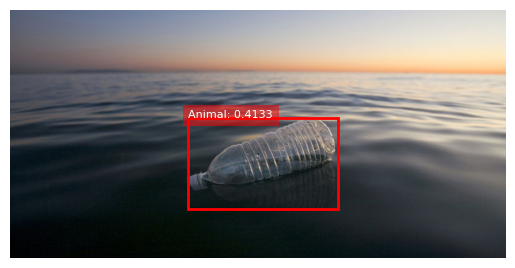

In [21]:
from clarifai.client.model import Model
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from PIL import Image
from io import BytesIO

# Initialize Clarifai model
model_url = "https://clarifai.com/clarifai/main/models/general-image-detection"
detector_model = Model(
    url=model_url,
    pat="0bab37cfda274c4c92d1cc38be6c22e2",
)

# Image URL for detection
DETECTION_IMAGE_URL = "https://th.bing.com/th/id/R.41977070e70b005f063c1b638b514125?rik=Lg4MhTfStPgPRA&riu=http%3a%2f%2fwww.beyonddesignchicago.com%2fwp-content%2fuploads%2f2017%2f05%2fWater-bottle-ocean-blog1.jpg&ehk=SJVJHZgv9g2p6cXfF4Yok23XY%2bpmG%2fPEz0DfdSHZ53o%3d&risl=&pid=ImgRaw&r=0"

# Perform prediction
prediction_response = detector_model.predict_by_url(
    DETECTION_IMAGE_URL, input_type="image"
)

# Extract regions
regions = prediction_response.outputs[0].data.regions

# Function to visualize the image with bounding boxes
def visualize_image_with_boxes(image_url, regions):
    # Load the image from URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)

    # Add bounding boxes
    for region in regions:
        # Accessing and rounding the bounding box values
        top_row = region.region_info.bounding_box.top_row * img.size[1]
        left_col = region.region_info.bounding_box.left_col * img.size[0]
        bottom_row = region.region_info.bounding_box.bottom_row * img.size[1]
        right_col = region.region_info.bounding_box.right_col * img.size[0]

        # Calculate width and height of the bounding box
        width = right_col - left_col
        height = bottom_row - top_row

        # Create a Rectangle patch
        rect = patches.Rectangle(
            (left_col, top_row), width, height, linewidth=2, edgecolor="r", facecolor="none"
        )

        # Add the patch to the Axes
        ax.add_patch(rect)

        # Add label to the bounding box
        for concept in region.data.concepts:
            name = concept.name
            value = round(concept.value, 4)
            ax.text(
                left_col,
                top_row,
                f"{name}: {value}",
                color="white",
                fontsize=8,
                bbox=dict(facecolor="red", alpha=0.5, edgecolor="none"),
            )

    # Show plot
    plt.axis("off")
    plt.show()


# Visualize the image with bounding boxes
visualize_image_with_boxes(DETECTION_IMAGE_URL, regions)


In [22]:
!pip install voila
!pip install clarifai
!jupyter serverextension enable --sys-prefix voila

import ipywidgets as widgets
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from PIL import Image
from io import BytesIO

from clarifai.client.model import Model

# Initialize Clarifai model
model_url = "https://clarifai.com/clarifai/main/models/general-image-detection"
detector_model = Model(
    url=model_url,
    pat="0bab37cfda274c4c92d1cc38be6c22e2",
)

# Function to perform object detection
def detect_objects(url):
    # Perform prediction
    prediction_response = detector_model.predict_by_url(url, input_type="image")

    # Extract regions
    regions = prediction_response.outputs[0].data.regions

    return regions

# Function to visualize the image with bounding boxes
def visualize_image_with_boxes(image_url, regions):
    # Load the image from URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the image
    ax.imshow(img)

    # Add bounding boxes
    for region in regions:
        # Accessing and rounding the bounding box values
        top_row = region.region_info.bounding_box.top_row * img.size[1]
        left_col = region.region_info.bounding_box.left_col * img.size[0]
        bottom_row = region.region_info.bounding_box.bottom_row * img.size[1]
        right_col = region.region_info.bounding_box.right_col * img.size[0]

        # Calculate width and height of the bounding box
        width = right_col - left_col
        height = bottom_row - top_row

        # Create a Rectangle patch
        rect = patches.Rectangle(
            (left_col, top_row), width, height, linewidth=2, edgecolor="r", facecolor="none"
        )

        # Add the patch to the Axes
        ax.add_patch(rect)

        # Add label to the bounding box
        for concept in region.data.concepts:
            name = concept.name
            value = round(concept.value, 4)
            ax.text(
                left_col,
                top_row,
                f"{name}: {value}",
                color="white",
                fontsize=8,
                bbox=dict(facecolor="red", alpha=0.5, edgecolor="none"),
            )

    # Show plot
    plt.axis("off")
    plt.show()

# Create text box for image URL
image_url_textbox = widgets.Text(
    value='',
    placeholder='Enter The Image URL.',
    description='Image URL:https://thumbs.dreamstime.com/b/bottle-message-float-ocean-sea-58058462.jpg',
    disabled=False,
    layout=widgets.Layout(width='50%', margin='20px 0 0 0')
)

# Output widget to display the image
output = widgets.Output()

# Function to handle button click event
def on_button_clicked(b):
    with output:
        clear_output()
        url = image_url_textbox.value
        regions = detect_objects(url)
        visualize_image_with_boxes(url, regions)

# Create button
detect_objects_button = widgets.Button(
    description="Detect Objects",
    button_style='primary',
    layout=widgets.Layout(margin='20px 0 0 0')
)

# Event listener
detect_objects_button.on_click(on_button_clicked)

# Styling
box_layout = widgets.Layout(
    display='flex',
    flex_flow='column',
    align_items='center',
    width='50%'
)

# Display widgets
box = widgets.VBox(
    [image_url_textbox, detect_objects_button, output],
    layout=box_layout
)
display(box)

#https://i.pinimg.com/564x/3d/35/1f/3d351fea6cb3010f434adecfe3a153b8.jpg
#https://i.pinimg.com/564x/44/49/62/444962dc666761443fea4f68b086f45e.jpg



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-se